In [12]:
import pandas as pd
import ramanspy as rp
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df_wheats = rp.datasets.wheat_lines(file="../wheats/Data.mat")

np.int64(0)

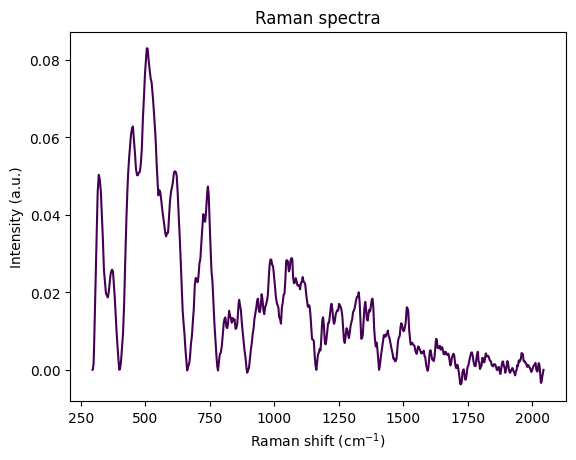

In [14]:
df_wheats[0][0].plot()
df_wheats[1][0]

In [15]:
spectra, labels, label_names = df_wheats

In [16]:
spectra.spectral_data.shape

(53134, 1748)

In [19]:
# Inspect the spectra object
print("Type of spectra object:", type(spectra))
print("Available attributes and methods:", dir(spectra))

Type of spectra object: <class 'ramanspy.core.SpectralContainer'>
Available attributes and methods: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'band', 'flat', 'from_stack', 'load', 'mean', 'save', 'shape', 'spectral_axis', 'spectral_data', 'spectral_length', 'tolist']


Spectra shape: (53134, 1748)
Labels shape: (53134,)


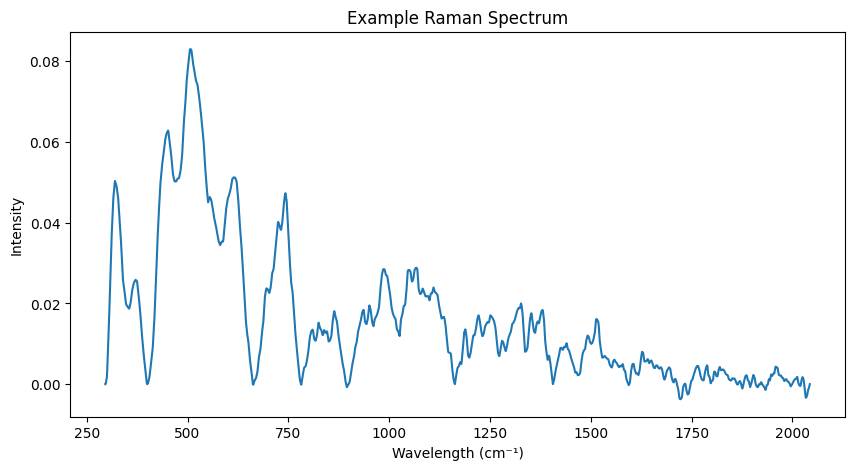

Unique labels: [0 1 2 3]
Label counts: [12663 12663 12659 15149]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_wheats = rp.datasets.wheat_lines(file="../wheats/Data.mat")
spectra, labels, label_names = df_wheats

# Check the shape of the data
print("Spectra shape:", spectra.spectral_data.shape)  # (53134, 1748)
print("Labels shape:", labels.shape)  # (53134,)

# Access wavelengths and spectral data
wavelengths = spectra.spectral_axis  # Use the 'spectral_axis' attribute for wavelengths
spectral_data = spectra.spectral_data  # Use the 'spectral_data' attribute for spectral data

# Plot an example spectrum
plt.figure(figsize=(10, 5))
plt.plot(wavelengths, spectral_data[0])
plt.xlabel("Wavelength (cm⁻¹)")
plt.ylabel("Intensity")
plt.title("Example Raman Spectrum")
plt.show()

# Check the unique labels and their counts
unique_labels, counts = np.unique(labels, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", counts)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode the labels into integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert the encoded labels to one-hot encoding
num_classes = len(label_encoder.classes_)
labels_one_hot = to_categorical(labels_encoded, num_classes=num_classes)

# Split the data into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(spectra.spectral_data, labels_one_hot, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the spectral data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Print the shapes of the datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (42507, 1748) (42507, 4)
Validation data shape: (5313, 1748) (5313, 4)
Test data shape: (5314, 1748) (5314, 4)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(32, activation='relu'))

# Output layer (for multi-class classification)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/Users/mitsuko/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       223,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,340 (915.39 KB)

 Trainable params: 234,340 (915.39 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7989 - loss: 0.4936 - val_accuracy: 0.8726 - val_loss: 0.3096
Epoch 2/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8846 - loss: 0.2943 - val_accuracy: 0.8818 - val_loss: 0.2943
Epoch 3/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8987 - loss: 0.2605 - val_accuracy: 0.8916 - val_loss: 0.2870
Epoch 4/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9076 - loss: 0.2382 - val_accuracy: 0.8955 - val_loss: 0.2642
Epoch 5/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9187 - loss: 0.2076 - val_accuracy: 0.8903 - val_loss: 0.2818
Epoch 6/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9215 - loss: 0.1995 - val_accuracy: 0.9002 - val_loss: 0.2643
Epoch 7/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9295 - loss: 0.1774 - val_accuracy: 0.8989 - val_loss: 0.2759
Epoch 8/50
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9348 - loss: 0.1724 - 

In [23]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Decode the predicted labels back to original class names
predicted_classes = label_encoder.inverse_transform(predicted_labels)
true_classes = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

# Compare predictions with actual values
for i in range(5):
    print(f"Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.9074 - loss: 0.5181
Test Loss: 0.5633643865585327
Test Accuracy: 0.9028980135917664
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
Predicted: 3, Actual: 3
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


In [24]:
model.save("raman_spectra_classifier.h5")